In [1]:
%matplotlib inline


import numpy as np

import xarray as xr
import geoplot.crs as gcrs
import regionmask 
import geopandas as gpd
import geoplot as gplt

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import numpy.ma as ma
import csv
import netCDF4 as nc
import scipy
import pandas
from glob import glob
import pandas as pd
from scipy.interpolate import Rbf

np.seterr(invalid='ignore'); # disable a warning from matplotlib and cartopy

In [2]:
# WILL USE THESE UNITS FOR CONVERSIONS LATER, INITIALIZE HERE
R=8.317 #J/(mol K)
MW=200.59 #molecular weight of hg in g/mol
ppt=1e-12 #current [Hg0] units is ex. .03 ppt, where ppt is 1e-12
stdpressure=101325 #pascals
stdtemp=273.15 #Kelvins

In [3]:
def fix_ds(ds):
    return ds.assign_coords({'LON':ds.LON, 'LAT':ds.LAT, 'ETAC':ds.ETAC, 'ETAE':ds.ETAE, 
                            'time':pd.to_datetime(ds.attrs['Start_Date'], format='%Y%m%d')}
                           ).expand_dims('time')

#open base files (with artisnal mining)
ds_base=xr.open_mfdataset('/net/fs03/d1/angot/postdoc/GMA_2018/my_runs/production_runs_2x2.5/BASE/netcdf_output/trac.2015*.nc',
                         preprocess=fix_ds, concat_dim=['time'], combine='by_coords')


In [4]:
ds_base

<xarray.Dataset>
Dimensions:             (Alt-000: 1, Alt-001: 38, Alt-002: 47, Alt-003: 48, Lat-000: 91, Lon-000: 144, time: 12)
Coordinates:
    LON                 (Lon-000) float32 dask.array<chunksize=(144,), meta=np.ndarray>
    LAT                 (Lat-000) float32 dask.array<chunksize=(91,), meta=np.ndarray>
    ETAC                (Alt-002) float32 dask.array<chunksize=(47,), meta=np.ndarray>
    ETAE                (Alt-003) float32 dask.array<chunksize=(48,), meta=np.ndarray>
  * time                (time) datetime64[ns] 2015-01-01 ... 2015-12-01
Dimensions without coordinates: Alt-000, Alt-001, Alt-002, Alt-003, Lat-000, Lon-000
Data variables:
    Ap                  (time, Alt-003) float32 dask.array<chunksize=(1, 48), meta=np.ndarray>
    Bp                  (time, Alt-003) float32 dask.array<chunksize=(1, 48), meta=np.ndarray>
    IJ-AVG-S__Hg0       (time, Alt-002, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 47, 91, 144), meta=np.ndarray>
    IJ-AVG-S__Hg2       (time, Alt-002, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 47, 91, 144), meta=np.ndarray>
    IJ-AVG-S__HgP       (time, Alt-002, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 47, 91, 144), meta=np.ndarray>
    EW-FLX-S__Hg0       (time, Alt-002, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 47, 91, 144), meta=np.ndarray>
    EW-FLX-S__Hg2       (time, Alt-002, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 47, 91, 144), meta=np.ndarray>
    EW-FLX-S__HgP       (time, Alt-002, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 47, 91, 144), meta=np.ndarray>
    NS-FLX-S__Hg0       (time, Alt-002, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 47, 91, 144), meta=np.ndarray>
    NS-FLX-S__Hg2       (time, Alt-002, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 47, 91, 144), meta=np.ndarray>
    NS-FLX-S__HgP       (time, Alt-002, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 47, 91, 144), meta=np.ndarray>
    UP-FLX-S__Hg0       (time, Alt-002, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 47, 91, 144), meta=np.ndarray>
    UP-FLX-S__Hg2       (time, Alt-002, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 47, 91, 144), meta=np.ndarray>
    UP-FLX-S__HgP       (time, Alt-002, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 47, 91, 144), meta=np.ndarray>
    WETDCV-S__Hg2       (time, Alt-002, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 47, 91, 144), meta=np.ndarray>
    WETDCV-S__HgP       (time, Alt-002, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 47, 91, 144), meta=np.ndarray>
    WETDLS-S__Hg2       (time, Alt-002, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 47, 91, 144), meta=np.ndarray>
    WETDLS-S__HgP       (time, Alt-002, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 47, 91, 144), meta=np.ndarray>
    MC-FRC-S__Hg2       (time, Alt-002, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 47, 91, 144), meta=np.ndarray>
    MC-FRC-S__HgP       (time, Alt-002, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 47, 91, 144), meta=np.ndarray>
    PEDGE-S__PSURF      (time, Alt-003, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 48, 91, 144), meta=np.ndarray>
    DAO-FLDS__PREACC    (time, Alt-000, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 1, 91, 144), meta=np.ndarray>
    DAO-FLDS__PRECON    (time, Alt-000, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 1, 91, 144), meta=np.ndarray>
    DAO-3D-S__TMPU      (time, Alt-002, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 47, 91, 144), meta=np.ndarray>
    DAO-3D-S__SPHU      (time, Alt-002, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 47, 91, 144), meta=np.ndarray>
    BXHGHT-S__BXHEIGHT  (time, Alt-002, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 47, 91, 144), meta=np.ndarray>
    BXHGHT-S__AD        (time, Alt-002, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 47, 91, 144), meta=np.ndarray>
    BXHGHT-S__AVGW      (time, Alt-002, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 47, 91

In [5]:
ds_base

<xarray.Dataset>
Dimensions:             (Alt-000: 1, Alt-001: 38, Alt-002: 47, Alt-003: 48, Lat-000: 91, Lon-000: 144, time: 12)
Coordinates:
    LON                 (Lon-000) float32 dask.array<chunksize=(144,), meta=np.ndarray>
    LAT                 (Lat-000) float32 dask.array<chunksize=(91,), meta=np.ndarray>
    ETAC                (Alt-002) float32 dask.array<chunksize=(47,), meta=np.ndarray>
    ETAE                (Alt-003) float32 dask.array<chunksize=(48,), meta=np.ndarray>
  * time                (time) datetime64[ns] 2015-01-01 ... 2015-12-01
Dimensions without coordinates: Alt-000, Alt-001, Alt-002, Alt-003, Lat-000, Lon-000
Data variables:
    Ap                  (time, Alt-003) float32 dask.array<chunksize=(1, 48), meta=np.ndarray>
    Bp                  (time, Alt-003) float32 dask.array<chunksize=(1, 48), meta=np.ndarray>
    IJ-AVG-S__Hg0       (time, Alt-002, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 47, 91, 144), meta=np.ndarray>
    IJ-AVG-S__Hg2       (time, Alt-002, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 47, 91, 144), meta=np.ndarray>
    IJ-AVG-S__HgP       (time, Alt-002, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 47, 91, 144), meta=np.ndarray>
    EW-FLX-S__Hg0       (time, Alt-002, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 47, 91, 144), meta=np.ndarray>
    EW-FLX-S__Hg2       (time, Alt-002, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 47, 91, 144), meta=np.ndarray>
    EW-FLX-S__HgP       (time, Alt-002, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 47, 91, 144), meta=np.ndarray>
    NS-FLX-S__Hg0       (time, Alt-002, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 47, 91, 144), meta=np.ndarray>
    NS-FLX-S__Hg2       (time, Alt-002, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 47, 91, 144), meta=np.ndarray>
    NS-FLX-S__HgP       (time, Alt-002, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 47, 91, 144), meta=np.ndarray>
    UP-FLX-S__Hg0       (time, Alt-002, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 47, 91, 144), meta=np.ndarray>
    UP-FLX-S__Hg2       (time, Alt-002, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 47, 91, 144), meta=np.ndarray>
    UP-FLX-S__HgP       (time, Alt-002, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 47, 91, 144), meta=np.ndarray>
    WETDCV-S__Hg2       (time, Alt-002, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 47, 91, 144), meta=np.ndarray>
    WETDCV-S__HgP       (time, Alt-002, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 47, 91, 144), meta=np.ndarray>
    WETDLS-S__Hg2       (time, Alt-002, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 47, 91, 144), meta=np.ndarray>
    WETDLS-S__HgP       (time, Alt-002, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 47, 91, 144), meta=np.ndarray>
    MC-FRC-S__Hg2       (time, Alt-002, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 47, 91, 144), meta=np.ndarray>
    MC-FRC-S__HgP       (time, Alt-002, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 47, 91, 144), meta=np.ndarray>
    PEDGE-S__PSURF      (time, Alt-003, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 48, 91, 144), meta=np.ndarray>
    DAO-FLDS__PREACC    (time, Alt-000, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 1, 91, 144), meta=np.ndarray>
    DAO-FLDS__PRECON    (time, Alt-000, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 1, 91, 144), meta=np.ndarray>
    DAO-3D-S__TMPU      (time, Alt-002, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 47, 91, 144), meta=np.ndarray>
    DAO-3D-S__SPHU      (time, Alt-002, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 47, 91, 144), meta=np.ndarray>
    BXHGHT-S__BXHEIGHT  (time, Alt-002, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 47, 91, 144), meta=np.ndarray>
    BXHGHT-S__AD        (time, Alt-002, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 47, 91, 144), meta=np.ndarray>
    BXHGHT-S__AVGW      (time, Alt-002, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 47, 91

In [6]:
#create shortened dataset for ds_base
ds_b=xr.Dataset()
ds_b['IJ-AVG-S_Hg0']=(ds_base['IJ-AVG-S__Hg0'])
ds_b['IJ-AVG-S_HgP']=(ds_base['IJ-AVG-S__HgP'])
ds_b['IJ-AVG-S_Hg2']=(ds_base['IJ-AVG-S__Hg2'])
ds_b['BXHGHT-S_BXHEIGHT']=(ds_base['BXHGHT-S__BXHEIGHT'])
ds_b['BXHGHT-S_T']=(ds_base['BXHGHT-S__T']) #Kelvins
ds_b['BXHGHT-S_PMID']=(ds_base['BXHGHT-S__PMID'])*100 #hpa to pa
ds_b['BXHGHT-S_PMID'].attrs['unit']='Pa'

df_base = ds_b.to_dataframe()
df_Bsurf=df_base

# #######changing units to ng/m3 from ppt using P/(TR)*pptv*MW #########

'''P/(TR)*ppt*MW --> Pa/(K*J/(mol*K))*ppt*g/mol --> g/m3*ppt. to get rid of ppt, multiply by 1e-12.'''
species=['IJ-AVG-S_Hg0', 'IJ-AVG-S_HgP', 'IJ-AVG-S_Hg2']
for s in species:
    df_Bsurf[s]= df_Bsurf[s]*ppt* stdpressure/(stdtemp*R)*MW*1e9 #1e9 converts from g to ng

#now units are ng/m3
ds_b['IJ-AVG-S_Hg0'].attrs['unit']='ng/m3'
df_Bsurf

LON   LAT      ETAC  IJ-AVG-S_Hg0  \
Alt-002 Lat-000 Lon-000 time                                              
0       0       0       2015-01-01 -180.0 -89.5  0.992500      0.296195   
                        2015-02-01 -180.0 -89.5  0.992500      0.375870   
                        2015-03-01 -180.0 -89.5  0.992500      0.543671   
                        2015-04-01 -180.0 -89.5  0.992500      0.700514   
                        2015-05-01 -180.0 -89.5  0.992500      0.807922   
...                                   ...   ...       ...           ...   
46      90      143     2015-08-01  177.5  89.5  0.000028      0.057536   
                        2015-09-01  177.5  89.5  0.000028      0.053611   
                        2015-10-01  177.5  89.5  0.000028      0.047656   
                        2015-11-01  177.5  89.5  0.000028      0.038048   
                        2015-12-01  177.5  89.5  0.000028      0.038596   

                                    IJ-AVG-S_HgP  IJ-AVG-S_Hg2  \
Alt-002 Lat-000 Lon-000 time                                     
0       0       0       2015-01-01      0.000755      0.193154   
                        2015-02-01      0.001226      0.172827   
                        2015-03-01      0.003294      0.091802   
                        2015-04-01      0.004061      0.030097   
                        2015-05-01      0.001511      0.014398   
...                                          ...           ...   
46      90      143     2015-08-01      0.000000      1.124543   
                        2015-09-01      0.000000      1.131129   
                        2015-10-01      0.000000      1.141518   
                        2015-11-01      0.000000      1.160122   
                        2015-12-01      0.000000      1.160532   

                                    BXHGHT-S_BXHEIGHT  BXHGHT-S_T  \
Alt-002 Lat-000 Lon-000 time                                        
0       0       0       2015-01-01         107.518860  243.372177   
                        2015-02-01         103.024323  233.246002   
                        2015-03-01          98.928185  223.993530   
                        2015-04-01          97.008392  219.652405   
                        2015-05-01          95.623589  216.517517   
...                                               ...         ...   
46      90      143     2015-08-01       11283.426758  204.310089   
                        2015-09-01       11975.202148  216.836838   
                        2015-10-01       12922.001953  233.980057   
                        2015-11-01       13430.950195  243.195435   
                        2015-12-01       13172.380859  238.513885   

                                    BXHGHT-S_PMID  
Alt-002 Lat-000 Lon-000 time                       
0       0       0       2015-01-01   68390.937500  
                        2015-02-01   67798.328125  
                        2015-03-01   67384.945312  
                        2015-04-01   67216.367188  
                        2015-05-01   67350.507812  
...                                           ...  
46      90      143     2015-08-01       3.799985  
                        2015-09-01       3.799978  
                        2015-10-01       3.799985  
                        2015-11-01       3.799978  
                        2015-12-01       3.799985  

[7390656 rows x 9 columns]

In [7]:
Ddate=[]
for row in df_Bsurf.itertuples():
    Ddate.append(row.Index[3])
df_Bsurf['time']=Ddate


In [8]:
df_Bsurf['time'] = pandas.to_datetime(df_Bsurf['time']) # Convert that column into a datetime datatype

df_Bsurf.index = df_Bsurf['time'] # Set the datetime column as the index


In [9]:
del df_Bsurf['ETAC']
df_Bsurf
df_Bsurf=df_Bsurf.loc[:, 'LON':'IJ-AVG-S_Hg0']

In [10]:
df_Bsurf['time']=Ddate

In [11]:

#df_base.index=df_base['LAT']
LapaLat = df_Bsurf[df_Bsurf.LAT > -58]
LapanLat = LapaLat[LapaLat.LAT<18]
LapanLon=LapanLat[LapanLat.LON>-92]
LAPAN= LapanLon[LapanLon.LON<-25]
LAPAN

,LON,LAT,IJ-AVG-S_Hg0,time
time,,,,
2015-01-01,-90.0,-56.0,0.732235,2015-01-01
2015-02-01,-90.0,-56.0,0.743483,2015-02-01
2015-03-01,-90.0,-56.0,0.743371,2015-03-01
2015-04-01,-90.0,-56.0,0.787097,2015-04-01
2015-05-01,-90.0,-56.0,0.909376,2015-05-01
...,...,...,...,...
2015-08-01,-27.5,16.0,0.055445,2015-08-01
2015-09-01,-27.5,16.0,0.051539,2015-09-01
2015-10-01,-27.5,16.0,0.042464,2015-10-01


In [12]:
LAPAN_gdf = gpd.GeoDataFrame(LAPAN, geometry = gpd.points_from_xy(LAPAN['LON'],LAPAN['LAT'] ))
#LAPAN_gdf.plot(markersize = 1.5, figsize = (10,10))
LAPAN_gdf

,LON,LAT,IJ-AVG-S_Hg0,time,geometry
time,,,,,
2015-01-01,-90.0,-56.0,0.732235,2015-01-01,POINT (-90.00000 -56.00000)
2015-02-01,-90.0,-56.0,0.743483,2015-02-01,POINT (-90.00000 -56.00000)
2015-03-01,-90.0,-56.0,0.743371,2015-03-01,POINT (-90.00000 -56.00000)
2015-04-01,-90.0,-56.0,0.787097,2015-04-01,POINT (-90.00000 -56.00000)
2015-05-01,-90.0,-56.0,0.909376,2015-05-01,POINT (-90.00000 -56.00000)
...,...,...,...,...,...
2015-08-01,-27.5,16.0,0.055445,2015-08-01,POINT (-27.50000 16.00000)
2015-09-01,-27.5,16.0,0.051539,2015-09-01,POINT (-27.50000 16.00000)
2015-10-01,-27.5,16.0,0.042464,2015-10-01,POINT (-27.50000 16.00000)


In [13]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
NAmerica =world.query('continent == "North America"')
CNAmerica=NAmerica.drop([3])
CAmerica=CNAmerica.drop([4])
CAmerica=CAmerica.drop([22])
CAmerica=CAmerica.drop([27])
CAmerica=CAmerica.drop([16,17,19,45,46,47,175])
CAmerica

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
33,3753142,North America,Panama,PAN,93120.0,"POLYGON ((-77.35336 8.67050, -77.47472 8.52429..."
34,4930258,North America,Costa Rica,CRI,79260.0,"POLYGON ((-82.54620 9.56613, -82.93289 9.47681..."
35,6025951,North America,Nicaragua,NIC,33550.0,"POLYGON ((-83.65561 10.93876, -83.89505 10.726..."
36,9038741,North America,Honduras,HND,43190.0,"POLYGON ((-83.14722 14.99583, -83.48999 15.016..."
37,6172011,North America,El Salvador,SLV,54790.0,"POLYGON ((-89.35333 14.42413, -89.05851 14.340..."
38,15460732,North America,Guatemala,GTM,131800.0,"POLYGON ((-92.22775 14.53883, -92.20323 14.830..."
39,360346,North America,Belize,BLZ,3088.0,"POLYGON ((-89.14308 17.80832, -89.15091 17.955..."


In [14]:
mx=LAPAN_gdf['IJ-AVG-S_Hg0'].max()
mn=LAPAN_gdf['IJ-AVG-S_Hg0'].min()

In [15]:
SAmerica = world.query('continent == "South America"')
#NAmerica =world.query('continent == "North America"')
fig, ax = plt.subplots(figsize = (15,15))


CAmerica.plot(ax=ax,color='white', edgecolor='gray' )
SAmerica.plot(ax=ax,color='white', edgecolor='gray' )
LAPAN_gdf.plot(ax=ax,column='IJ-AVG-S_Hg0', categorical=True, \
        k=10, cmap='OrRd', linewidth=0.1, \
        edgecolor='white', legend=True )

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f488d9b9940> (for post_execute):


KeyboardInterrupt: 

In [16]:
Lapan= pd.read_csv('Lapan.csv')
# Creating GeoPandas GeoDataFrame using the Pandas Dataframe 
Lapan_gdf = gpd.GeoDataFrame(Lapan, geometry = gpd.points_from_xy(Lapan['Longitude'],Lapan['Latitude'] ))
Lapan_gdf

Lapan2 = Lapan_gdf.drop([13])
Lapan2

,Site,Latitude,Longitude,Date of deployment,Date of removal,Deployment length (days),Measured Conc (ng/m3),geometry
0,"Iguaçu National Park, PR",-25.626736,-54.478653,2017-10-20,2018-11-09 00:00:00,385,0.63,POINT (-54.47865 -25.62674)
1,"São José dos Ausentes, RS",-28.596650,-49.813100,2017-11-16,2018-11-20 00:00:00,369,0.63,POINT (-49.81310 -28.59665)
2,"Rocas Atoll, RN",-3.856411,-33.817428,2017-11-20,2019-02-24 00:00:00,461,0.33,POINT (-33.81743 -3.85641)
3,"Cristalino State Park, MT",-9.597813,-55.932276,2017-12-05,2019-03-27 00:00:00,477,0.57,POINT (-55.93228 -9.59781)
4,"Abrolhos (Redonda Island), BA",-18.131667,-38.797778,2018-01-16,2019-01-13 00:00:00,362,0.96,POINT (-38.79778 -18.13167)
5,"Rio Grande, RS",-32.068906,-52.161475,2018-02-01,2019-01-31 00:00:00,364,1,POINT (-52.16148 -32.06891)
6,"Puruzinho, AM",-7.370556,-63.059444,2018-03-24,2019-04-06 00:00:00,378,0.79,POINT (-63.05944 -7.37056)
7,"Itatiaia National Park, RJ",-22.385833,-44.678889,2018-03-27,2019-07-02 00:00:00,462,0.8,POINT (-44.67889 -22.38583)
8,"São Luis do maranhão, MA",-2.593833,-44.211194,2018-04-06,2019-04-01 00:00:00,360,1.04,POINT (-44.21119 -2.59383)
9,"Nova Nazaré, MT",-13.958617,-51.776933,2018-04-13,2019-04-18 00:00:00,370,0.76,POINT (-51.77693 -13.95862)


In [17]:
LAPAN_gdf

,LON,LAT,IJ-AVG-S_Hg0,time,geometry
time,,,,,
2015-01-01,-90.0,-56.0,0.732235,2015-01-01,POINT (-90.00000 -56.00000)
2015-02-01,-90.0,-56.0,0.743483,2015-02-01,POINT (-90.00000 -56.00000)
2015-03-01,-90.0,-56.0,0.743371,2015-03-01,POINT (-90.00000 -56.00000)
2015-04-01,-90.0,-56.0,0.787097,2015-04-01,POINT (-90.00000 -56.00000)
2015-05-01,-90.0,-56.0,0.909376,2015-05-01,POINT (-90.00000 -56.00000)
...,...,...,...,...,...
2015-08-01,-27.5,16.0,0.055445,2015-08-01,POINT (-27.50000 16.00000)
2015-09-01,-27.5,16.0,0.051539,2015-09-01,POINT (-27.50000 16.00000)
2015-10-01,-27.5,16.0,0.042464,2015-10-01,POINT (-27.50000 16.00000)


<AxesSubplot:>

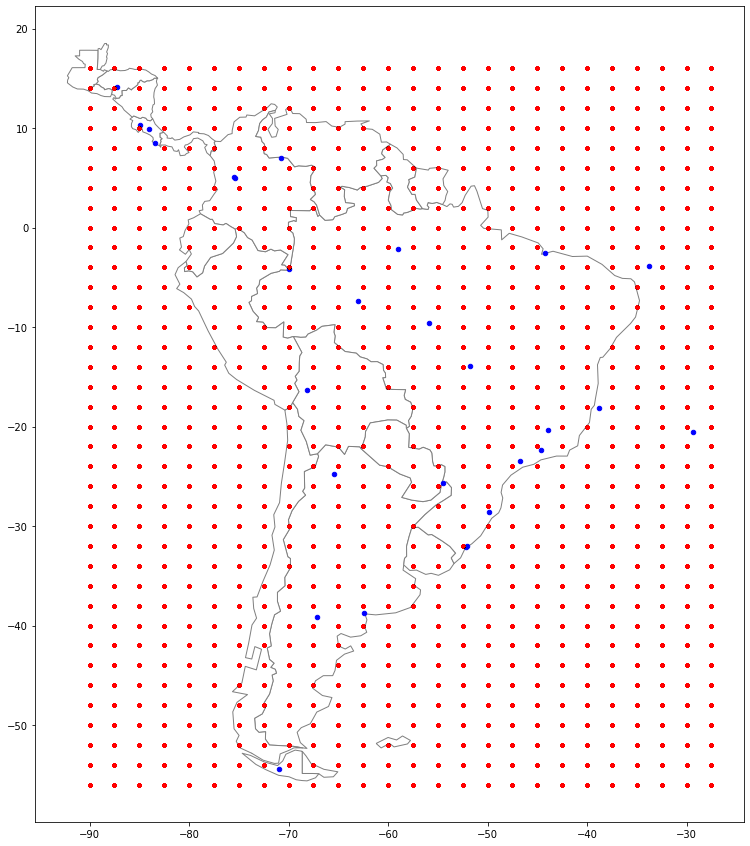

In [18]:
SAmerica = world.query('continent == "South America"')
#NAmerica =world.query('continent == "North America"')
fig, ax = plt.subplots(figsize = (15,15))
CAmerica.plot(ax=ax,color='white', edgecolor='gray' )
SAmerica.plot(ax=ax,color='white', edgecolor='gray' )
Lapan_gdf.plot(ax=ax,marker='o', color='blue', markersize=20)
LAPAN_gdf.plot(ax=ax,marker='o', color='red', markersize=5)

In [19]:
Long= LAPAN.groupby('LON')
Long.groups.keys();

In [20]:
Lkey =Long.groups.keys() 
Hg0 = []
longit = []
latitu = []
for long in Lkey:
    Lgroup = Long.get_group(long).groupby('LAT')
    key =  Lgroup.groups.keys()
    for item in key:
        
        longi = Lgroup.get_group(item).mean()[0]
        longit.append(longi)
        latit=Lgroup.get_group(item).mean()[1]
        latitu.append(latit)
        HG = Lgroup.get_group(item).mean()[2]
        Hg0.append(HG)

    
df2= pd.DataFrame({"LON":longit,"LAT":latitu,"IJ-AVG-S_Hg0":Hg0})
df2   
    
   

<ipython-input-20-2b3e5bcaa3be>:10: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  longi = Lgroup.get_group(item).mean()[0]
<ipython-input-20-2b3e5bcaa3be>:12: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  latit=Lgroup.get_group(item).mean()[1]
<ipython-input-20-2b3e5bcaa3be>:14: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  HG = Lgroup.get_group(item).mean()[2]


,LON,LAT,IJ-AVG-S_Hg0
0,-90.0,-56.0,0.530230
1,-90.0,-54.0,0.534771
2,-90.0,-52.0,0.540477
3,-90.0,-50.0,0.545026
4,-90.0,-48.0,0.549657
...,...,...,...
957,-27.5,8.0,0.908470
958,-27.5,10.0,0.905916
959,-27.5,12.0,0.897345
960,-27.5,14.0,0.885279


In [21]:
 df_Latin = gpd.GeoDataFrame(df2 , geometry = gpd.points_from_xy(df2['LON'],df2['LAT'] ))

In [22]:
def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique))


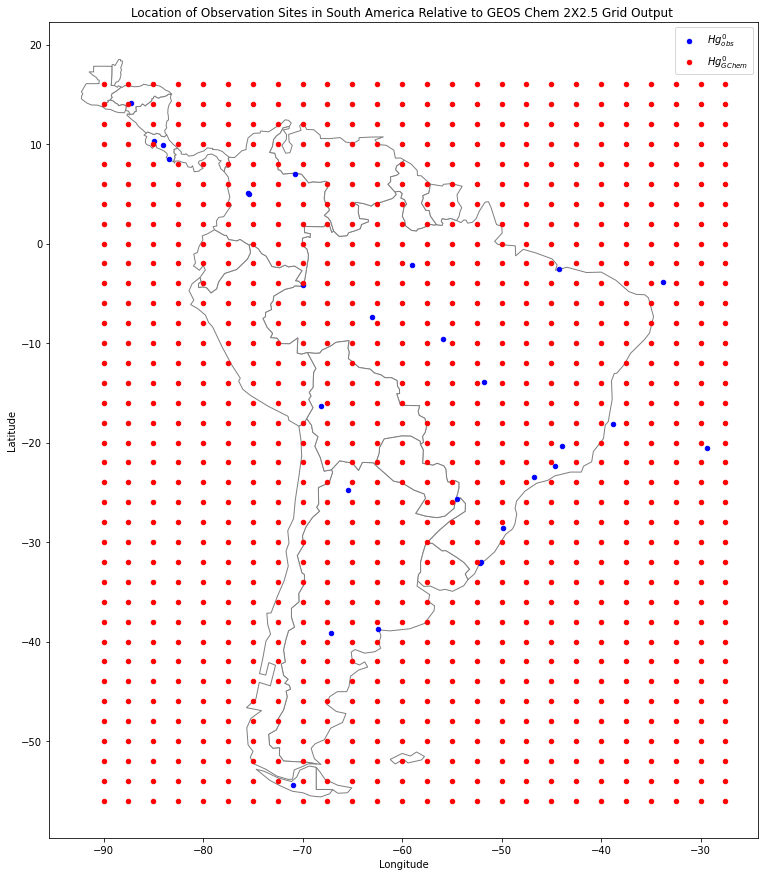

In [23]:
fig, ax = plt.subplots(figsize = (15,15))
CAmerica.plot(ax=ax,color='white', edgecolor='gray' )
SAmerica.plot(ax=ax,color='white', edgecolor='gray' )
Lapan_gdf.plot(ax=ax,marker='o', color='blue', markersize=20,label='$Hg^0_{obs}$')
df_Latin.plot(ax=ax,marker='o', color='red', markersize=20,label='$Hg^0_{GChem}$')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Location of Observation Sites in South America Relative to GEOS Chem 2X2.5 Grid Output ')
legend_without_duplicate_labels(ax)




Use KDTree to select the geoschem outputs near observational sites

In [24]:
df2
cods=[]
for i, j in df2.iterrows(): 
    coord=(j['LAT'],j['LON'])
    cods.append(coord) #coordinate pairs of the the Geoschem outputs


In [25]:
from scipy import spatial
model_outputs = cods
tree = spatial.KDTree(model_outputs)
df2.iloc[tree.query([(-25.626736,-54.478653)])[1][0]][2]

0.7422167081281565

In [26]:
tree = spatial.KDTree(cods)# create a tree of the above grid
GEOS = []
for i, j in Lapan_gdf.iterrows():
    
    point=df2.iloc[tree.query([(j['Latitude'],j['Longitude'])])[1][0]][2]
    GEOS.append(point)


In [27]:
Lapan_gdf=Lapan_gdf.sort_values('Latitude')
Lapan_gdf

,Site,Latitude,Longitude,Date of deployment,Date of removal,Deployment length (days),Measured Conc (ng/m3),geometry
15,Glacie Dawin (Schapiarelli),-54.414400,-70.915700,2019-04-20,"March 14, 2020",329,0.79,POINT (-70.91570 -54.41440)
25,Villa Regina,-39.102333,-67.108361,2018-05-05,2019-05-01 00:00:00,361,0.79,POINT (-67.10836 -39.10233)
26,Bahia Blanca (after),-38.699528,-62.444778,2018-05-04,2019-04-30 00:00:00,361,0.95,POINT (-62.44478 -38.69953)
5,"Rio Grande, RS",-32.068906,-52.161475,2018-02-01,2019-01-31 00:00:00,364,1,POINT (-52.16148 -32.06891)
14,"Rio Grande, RS (Praça Tamandaré)",-32.033583,-52.099300,2018-12-29,2019-12-16 00:00:00,352,0.95,POINT (-52.09930 -32.03358)
1,"São José dos Ausentes, RS",-28.596650,-49.813100,2017-11-16,2018-11-20 00:00:00,369,0.63,POINT (-49.81310 -28.59665)
0,"Iguaçu National Park, PR",-25.626736,-54.478653,2017-10-20,2018-11-09 00:00:00,385,0.63,POINT (-54.47865 -25.62674)
27,Salta,-24.721342,-65.406064,2018-12-15,"January 6, 2020",387,0.99,POINT (-65.40606 -24.72134)
12,"Pico do Jaraguá, SP",-23.456314,-46.766117,2018-07-20,2019-07-31 00:00:00,376,1.22,POINT (-46.76612 -23.45631)
7,"Itatiaia National Park, RJ",-22.385833,-44.678889,2018-03-27,2019-07-02 00:00:00,462,0.8,POINT (-44.67889 -22.38583)


Extract the Hg concentration with their coordinates

In [28]:
LAP=pd.DataFrame()
LAP['LONG']=Lapan_gdf['Longitude']
LAP['LATI']=Lapan_gdf['Latitude']
LAP['OBS']=Lapan_gdf['Measured Conc (ng/m3)']
LAP =LAP.reset_index(drop=True)
LAP

,LONG,LATI,OBS
0,-70.915700,-54.414400,0.79
1,-67.108361,-39.102333,0.79
2,-62.444778,-38.699528,0.95
3,-52.161475,-32.068906,1
4,-52.099300,-32.033583,0.95
5,-49.813100,-28.596650,0.63
6,-54.478653,-25.626736,0.63
7,-65.406064,-24.721342,0.99
8,-46.766117,-23.456314,1.22
9,-44.678889,-22.385833,0.8


In [29]:
LAP['OBS'].iloc[20]=0.88
LAP

/home/tzd/anaconda3/envs/UniToro/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,LONG,LATI,OBS
0,-70.915700,-54.414400,0.79
1,-67.108361,-39.102333,0.79
2,-62.444778,-38.699528,0.95
3,-52.161475,-32.068906,1
4,-52.099300,-32.033583,0.95
5,-49.813100,-28.596650,0.63
6,-54.478653,-25.626736,0.63
7,-65.406064,-24.721342,0.99
8,-46.766117,-23.456314,1.22
9,-44.678889,-22.385833,0.8


In [30]:
#The observations are currently recorded as strings. They need to be changed to floating point numbers
observe=[]
for item in LAP['OBS']:
    observe.append(float(item))
observe    
LAP['OBS']=observe


## Compare GEOS_Chem Output with the Measured Data 

In [31]:
#Use KDTree to find what the geos chem outputs are at the locations of the measurement sites
tree = spatial.KDTree(cods)
GEOS = []
for i, j in LAP.iterrows():
#print(df2.iloc[tree.query([(j['LATI'],j['LONG'])])[1][0]])
    point=df2.iloc[tree.query([(j['LATI'],j['LONG'])])[1][0]][2]
    GEOS.append(point)


In [32]:
LAP['GChem']=GEOS
LAP

,LONG,LATI,OBS,GChem
0,-70.915700,-54.414400,0.79,0.531134
1,-67.108361,-39.102333,0.79,0.570120
2,-62.444778,-38.699528,0.95,0.588095
3,-52.161475,-32.068906,1.00,0.652693
4,-52.099300,-32.033583,0.95,0.652693
5,-49.813100,-28.596650,0.63,0.712356
6,-54.478653,-25.626736,0.63,0.742217
7,-65.406064,-24.721342,0.99,0.772779
8,-46.766117,-23.456314,1.22,0.754598
9,-44.678889,-22.385833,0.80,0.763115


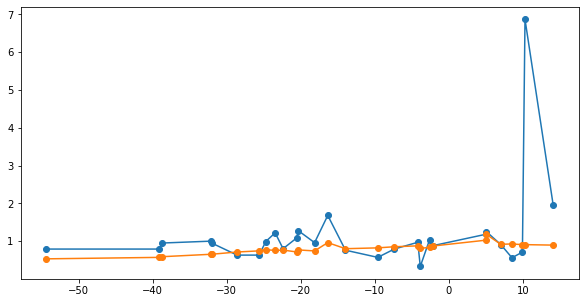

In [33]:
fig = plt.figure(figsize=[10,5])
ax = fig.add_subplot(111)
#plt.plot(listing)
plt.plot(LAP['LATI'],LAP['OBS'],'o-',LAP['LATI'],LAP['GChem'],'o-')

In [34]:
#Drop the 6.87 reading since it is an outlier
LAPA = LAP.drop(index=26)
LAPA

,LONG,LATI,OBS,GChem
0,-70.915700,-54.414400,0.79,0.531134
1,-67.108361,-39.102333,0.79,0.570120
2,-62.444778,-38.699528,0.95,0.588095
3,-52.161475,-32.068906,1.00,0.652693
4,-52.099300,-32.033583,0.95,0.652693
5,-49.813100,-28.596650,0.63,0.712356
6,-54.478653,-25.626736,0.63,0.742217
7,-65.406064,-24.721342,0.99,0.772779
8,-46.766117,-23.456314,1.22,0.754598
9,-44.678889,-22.385833,0.80,0.763115


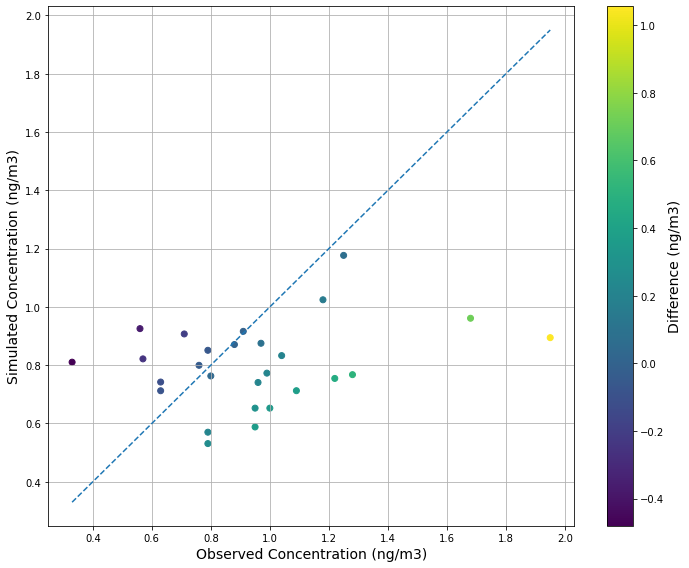

In [35]:
#Create a basic scatter plot with Matplotlib
#A identity line was created based on the minumum and maximum observed value
#Points markers are colored by the residual and a residual colorbar is added to the figure
LAPA['Residual'] = LAPA['OBS']-LAPA['GChem']
fig = plt.figure(figsize=(10,8))
x = np.linspace(LAPA['OBS'].min(),LAPA['OBS'].max(), 100)
plt.plot(x, x, linestyle='dashed')
plt.scatter(LAPA['OBS'],LAPA['GChem'], marker='o', c=LAPA['Residual'])

cbar = plt.colorbar()
cbar.set_label('Difference (ng/m3)', fontsize=14)

plt.grid()
plt.xlabel('Observed Concentration (ng/m3)', fontsize=14)
plt.ylabel('Simulated Concentration (ng/m3)', fontsize=14)
fig.tight_layout()
#fig.savefig('../Figures/ObservedSimulatedHeadComparisonPlot.png')

slope: 0.12160840486964729 
intercept: 0.6854702560010413 
r squared: 0.08400850409269184 
p-value: 0.1425143128341354 
st_error 0.08031148987574807 
RMSE 0.28339281902643204


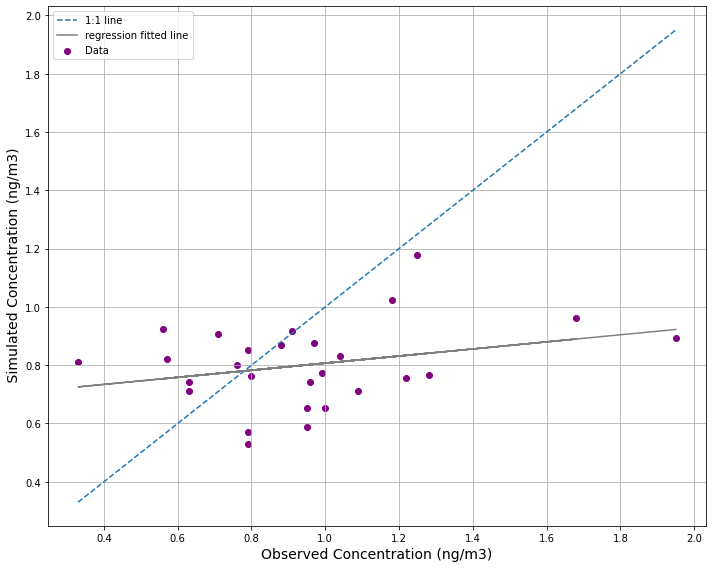

In [36]:
from math import *
import numpy as np
from scipy import stats

x = LAPA['OBS']
y=LAPA['GChem']
slope, intercept, r_value, p_value, std_err= stats.linregress(x, y)
m = slope.astype(float)
#Create a basic scatter plot with Matplotlib
#A identity line was created based on the minumum and maximum observed value
#Points markers are colored by the residual and a residual colorbar is added to the figure
#df_compare['Residual'] = df_compare['GChem']- df_compare['Hg0_M_C(ng/m3)']
fig = plt.figure(figsize=(10,8))
z = np.linspace(x.min(),x.max(), 100)
plt.plot(z, z, linestyle='dashed',label="1:1 line")
plt.scatter(x,y, marker='o',color="purple",label="Data")
plt.plot(x, m*x + intercept, 'grey', label='regression fitted line')

#cbar = plt.colorbar()
#cbar.set_label('Residual (ng/m3)', fontsize=14)

plt.grid()
plt.legend()
plt.xlabel('Observed Concentration (ng/m3)', fontsize=14)
plt.ylabel(' Simulated Concentration (ng/m3)', fontsize=14)
fig.tight_layout()
#fig.savefig('../Figures/ObservedSimulatedHeadComparisonPlot.png')
print("slope:", slope,
      "\nintercept:", intercept,
      "\nr squared:", r_value**2,
      "\np-value:", p_value,
      "\nst_error", std_err,
      "\nRMSE", sqrt(std_err))

In [37]:
#grap the latitude values from the data set to use for the x axes
Latitude =[]
for item in LAPA['LATI']:
    Latitude.append(round(item, 2))


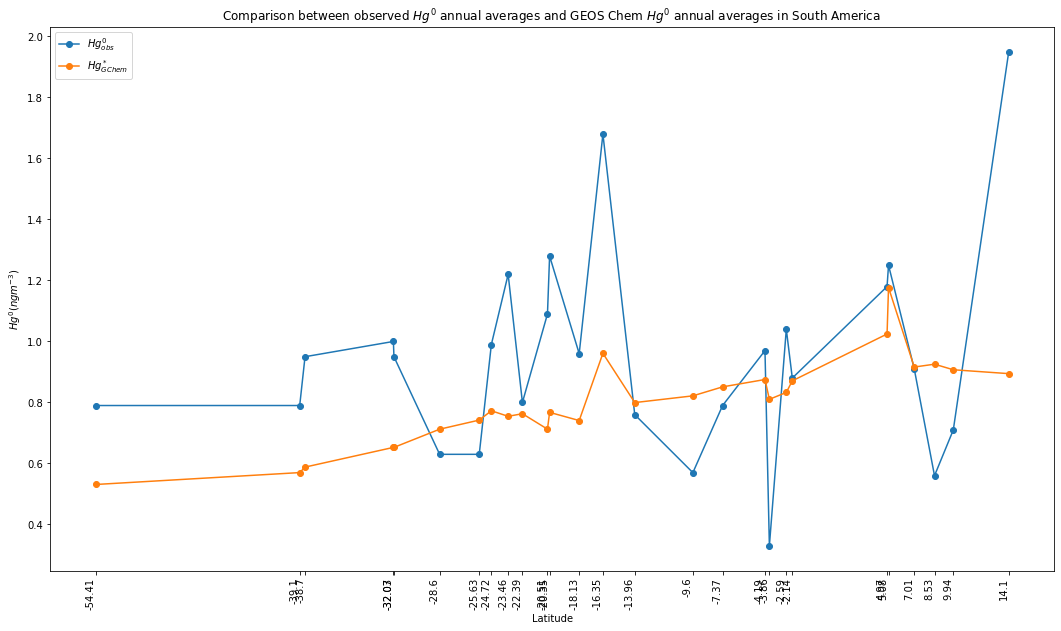

In [38]:
labels = Latitude
Hg0obs = LAPA['OBS']
Hg0_GC = LAPA['GChem']

x = Latitude  # the label locations


fig, ax = plt.subplots(figsize=[18,10])
rects1 = ax.plot(x,Hg0obs,'o-', label='$Hg^0_{obs}$')
rects2 = ax.plot(x,Hg0_GC,'o-', label='$Hg^*_{GChem}$')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('$Hg^0 (ngm^{-3})$')
ax.set_title('Comparison between observed $Hg^0$ annual averages and GEOS Chem $Hg^0$ annual averages in South America ')
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation=90, fontsize=10,ha='right')
#plt.xticks(x, labels, rotation='vertical')
#ax.legend()
ax.set_xlabel('Latitude')
legend_without_duplicate_labels(ax)

plt.show()

In [39]:
LAPA.drop(columns=['GChem','Residual'])

,LONG,LATI,OBS
0,-70.915700,-54.414400,0.79
1,-67.108361,-39.102333,0.79
2,-62.444778,-38.699528,0.95
3,-52.161475,-32.068906,1.00
4,-52.099300,-32.033583,0.95
5,-49.813100,-28.596650,0.63
6,-54.478653,-25.626736,0.63
7,-65.406064,-24.721342,0.99
8,-46.766117,-23.456314,1.22
9,-44.678889,-22.385833,0.80


In [40]:
LAPAG =gpd.GeoDataFrame(LAPA , geometry = gpd.points_from_xy(LAPA['LONG'],LAPA['LATI'] ))

L_OBS_GEO =LAPAG.drop(columns=['GChem','Residual']) 
L_GC_GEO =LAPAG.drop(columns=['OBS','Residual']) 


Text(0.5, 1.0, 'Location of Observation Sites in South America Relative to GEOS Chem 2X2.5 Grid Output ')

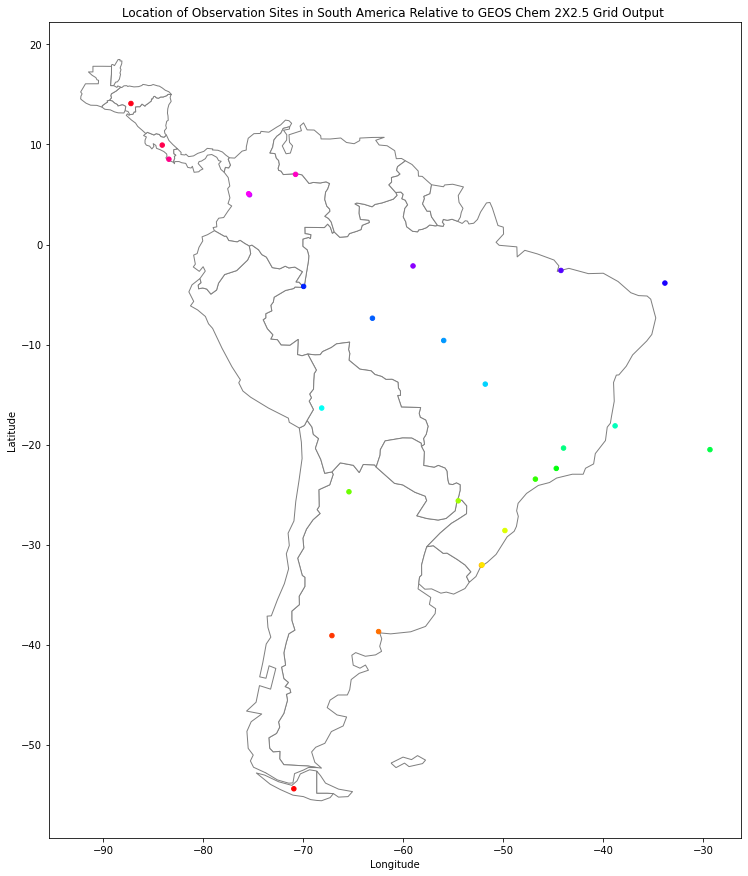

In [41]:
fig, ax = plt.subplots(figsize = (15,15))
CAmerica.plot(ax=ax,color='white', edgecolor='gray' )
SAmerica.plot(ax=ax,color='white', edgecolor='gray' )
L_OBS_GEO.plot(ax=ax,marker='o',cmap='hsv', markersize=20,
               label='$Hg^0_{obs}$',
               legend=True,
               legend_kwds={'label': "Population by Country",'orientation': "horizontal"})
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Location of Observation Sites in South America Relative to GEOS Chem 2X2.5 Grid Output ')
#legend_without_duplicate_labels(ax)
#cbar = plt.colorbar()
#cbar.set_label('Difference (ng/m3)', fontsize=14)



/home/tzd/anaconda3/envs/UniToro/lib/python3.8/site-packages/geoplot/geoplot.py:1723: UserWarning: "webmap" is only compatible with the "WebMercator" projection, but the input projection is unspecified. Reprojecting the data to "WebMercator" automatically. To suppress this warning, set "projection=gcrs.WebMercator()" explicitly.
  warnings.warn(
/home/tzd/anaconda3/envs/UniToro/lib/python3.8/site-packages/geoplot/geoplot.py:257: UserWarning: Please specify "legend_var" explicitly when both "hue" and "scale" are specified. Defaulting to "legend_var='hue'".
  warnings.warn(


<GeoAxesSubplot:>

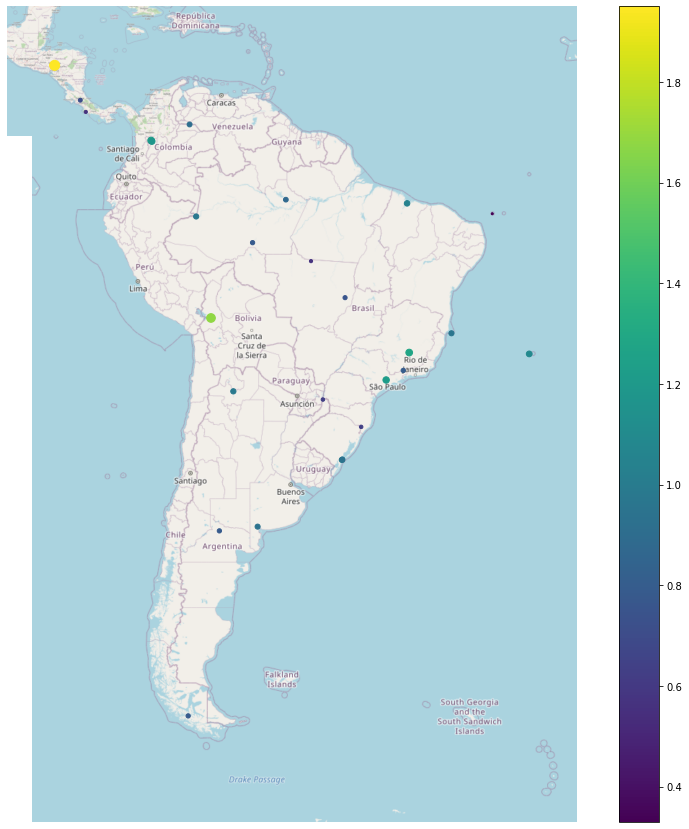

In [42]:
ax = gplt.webmap(SAmerica,figsize = (15,15))
gplt.webmap(CAmerica,ax=ax)

gplt.pointplot(
    L_OBS_GEO, projection=gcrs.AlbersEqualArea(),
    scale='OBS', limits=(2, 10),
    hue='OBS', cmap='viridis',
    legend=True,
    ax=ax)

Text(0.5, 1.0, 'Mercury Observations')

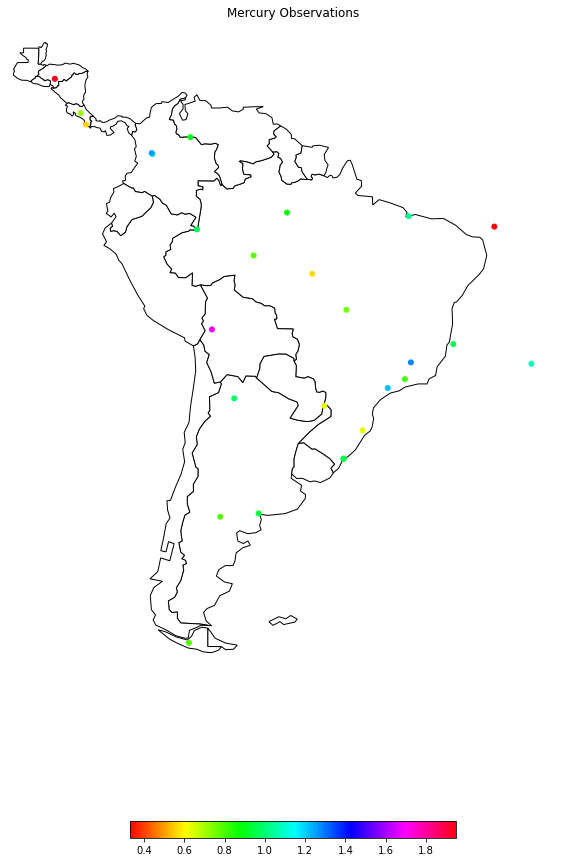

In [43]:
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
import mapclassify as mc




ax = gplt.polyplot(
    SAmerica,
    linewidth=1,
    edgecolor='black',
    facecolor='white',
    figsize=(15, 15)
)
gplt.polyplot(
    CAmerica,
    linewidth=1,edgecolor='black',
    facecolor='white',
    ax=ax
)
gplt.pointplot(
    L_OBS_GEO,hue='OBS', cmap='hsv',
    legend=True,legend_kwargs={'orientation': 'horizontal', 'fraction':0.02}, 
    ax=ax)

plt.title("Mercury Observations")

Text(0.5, 1.0, 'GeosChem Mercury Simulation Outputs')

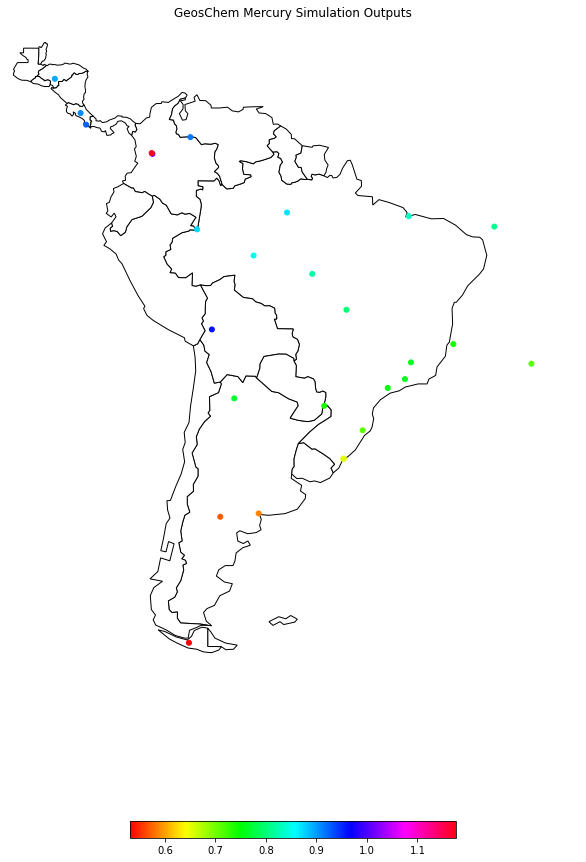

In [44]:
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
import mapclassify as mc




ax = gplt.polyplot(
    SAmerica,
    linewidth=1,
    edgecolor='black',
    facecolor='white',
    figsize=(15, 15)
)
gplt.polyplot(
    CAmerica,
    linewidth=1,
    edgecolor='black',
    facecolor='white',ax=ax
)
gplt.pointplot(
    L_GC_GEO,hue='GChem', cmap='hsv',
    legend=True, legend_kwargs={'orientation': 'horizontal', 'fraction':0.02},
    ax=ax)

plt.title("GeosChem Mercury Simulation Outputs")